1 - Professores substitutos vs Professores permanentes 

2 - Comparar variáveis de forma imparcial para encontrar respostas 

3 - O quanto um professor melhora ao longo dos anos 

4 - Qual a relação das notas de um professor com o desempennho da turma (reprovação, trancamento, notas, etc)

## Baixando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
plt.style.use('ggplot')

## Baixando bases de dados

In [3]:
df = pd.read_csv("../limpezaSegundafase/CSVs/Finais/avaliacoes_Docentes_Turmas.csv", sep = ";")

## Visualização Inicial

In [4]:
df.head()

,nome,sexo,formacao,vinculo,categoria,classe_funcional,lotacao,id_turma,ano,periodo,...,media_final_geral,qtd_aprovado,qtd_desistencia,qtd_reprovado_por_média_e_por_faltas,qtd_trancado,qtd_aprovado_por_nota,qtd_reprovado,qtd_reprovado_por_faltas,qtd_reprovado_por_nota_e_falta,qtd_reprovado_por_nota
0,gAAAAABoK5E6j5TbqZPDJ5NYzMxdBZriI-CsNEuDKbVirf...,M,MESTRADO,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,C ...,ESCOLA DE MÚSICA,57597342,2017,1,...,8.818182,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gAAAAABoK5E6R1hu4dSPg8FkFOEIEmcEYHlYvmPJzZEPPd...,F,DOUTORADO,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,Classe A - Auxiliar ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1207402,2013,2,...,6.483333,6.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0
2,gAAAAABoK5E6eAVCeUnbWC3nbkQx-aLvuBnJzHRQosKbFN...,F,DOUTORADO,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,Classe A - Auxiliar ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1224417,2014,1,...,8.557143,7.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,gAAAAABoK5E6qJDKzYFcqZH3pJgHamgSiwc4TQHNCtoo1d...,F,DOUTORADO,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,Classe A - Auxiliar ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1239782,2015,1,...,8.207692,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,gAAAAABoK5E6U5XZ1G27srNXBhH4mD1rnNwCC3N_ABu4Tw...,F,DOUTORADO,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,Classe A - Auxiliar ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1239821,2015,1,...,10.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
display(df.info())
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103431 entries, 0 to 103430
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   nome                                  103431 non-null  object 
 1   sexo                                  103431 non-null  object 
 2   formacao                              103431 non-null  object 
 3   vinculo                               103431 non-null  object 
 4   categoria                             103431 non-null  object 
 5   classe_funcional                      103431 non-null  object 
 6   lotacao                               103431 non-null  object 
 7   id_turma                              103431 non-null  int64  
 8   ano                                   103431 non-null  int64  
 9   periodo                               103431 non-null  int64  
 10  qtd_discentes                         103431 non-null  int64  
 11  

None

Index(['nome', 'sexo', 'formacao', 'vinculo', 'categoria', 'classe_funcional',
       'lotacao', 'id_turma', 'ano', 'periodo', 'qtd_discentes',
       'postura_profissional_media', 'postura_profissional_DP',
       'atuacao_profissional_media', 'atuacao_profissional_DP',
       'autoavaliacao_aluno_media', 'autoavaliacao_aluno_DP', 'ano_admissao',
       'media_final_geral', 'qtd_aprovado', 'qtd_desistencia',
       'qtd_reprovado_por_média_e_por_faltas', 'qtd_trancado',
       'qtd_aprovado_por_nota', 'qtd_reprovado', 'qtd_reprovado_por_faltas',
       'qtd_reprovado_por_nota_e_falta', 'qtd_reprovado_por_nota'],
      dtype='object')

In [6]:
df.describe()

,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP,...,media_final_geral,qtd_aprovado,qtd_desistencia,qtd_reprovado_por_média_e_por_faltas,qtd_trancado,qtd_aprovado_por_nota,qtd_reprovado,qtd_reprovado_por_faltas,qtd_reprovado_por_nota_e_falta,qtd_reprovado_por_nota
count,1.034310e+05,103431.000000,103431.000000,103431.000000,103431.000000,103431.000000,103431.000000,103431.000000,69488.000000,69488.000000,...,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000,103061.000000
mean,4.844045e+07,2018.107453,1.553055,21.900861,9.421411,0.937236,9.182315,1.283356,9.099114,1.474963,...,7.900465,14.802302,0.532665,0.973307,0.690484,4.520692,1.550790,0.018145,0.011178,0.033592
std,2.084250e+07,2.719409,0.497180,17.387849,0.703810,0.741946,0.705637,0.735324,0.596536,0.709125,...,1.065886,13.194377,1.383076,2.718349,1.532549,7.132048,4.686125,0.166296,0.117097,0.235252
min,1.207257e+06,2013.000000,1.000000,0.000000,0.340000,0.000000,0.500000,0.000000,4.340000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.757891e+07,2016.000000,1.000000,8.000000,9.240000,0.390000,8.860000,0.770000,8.720000,1.000000,...,7.120000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.762644e+07,2018.000000,2.000000,17.000000,9.650000,0.810000,9.340000,1.230000,9.140000,1.520000,...,7.966667,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.767787e+07,2021.000000,2.000000,31.000000,9.880000,1.330000,9.690000,1.730000,9.570000,1.980000,...,8.714286,21.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000
max,5.771184e+07,2022.000000,2.000000,306.000000,10.000000,7.070000,10.000000,4.720000,10.000000,4.170000,...,10.000000,291.000000,56.000000,82.000000,35.000000,169.000000,105.000000,6.000000,4.000000,10.000000


## Análise geral

Primeiro, vamos ver a distribuição dos valores numéricos mais relevantes.

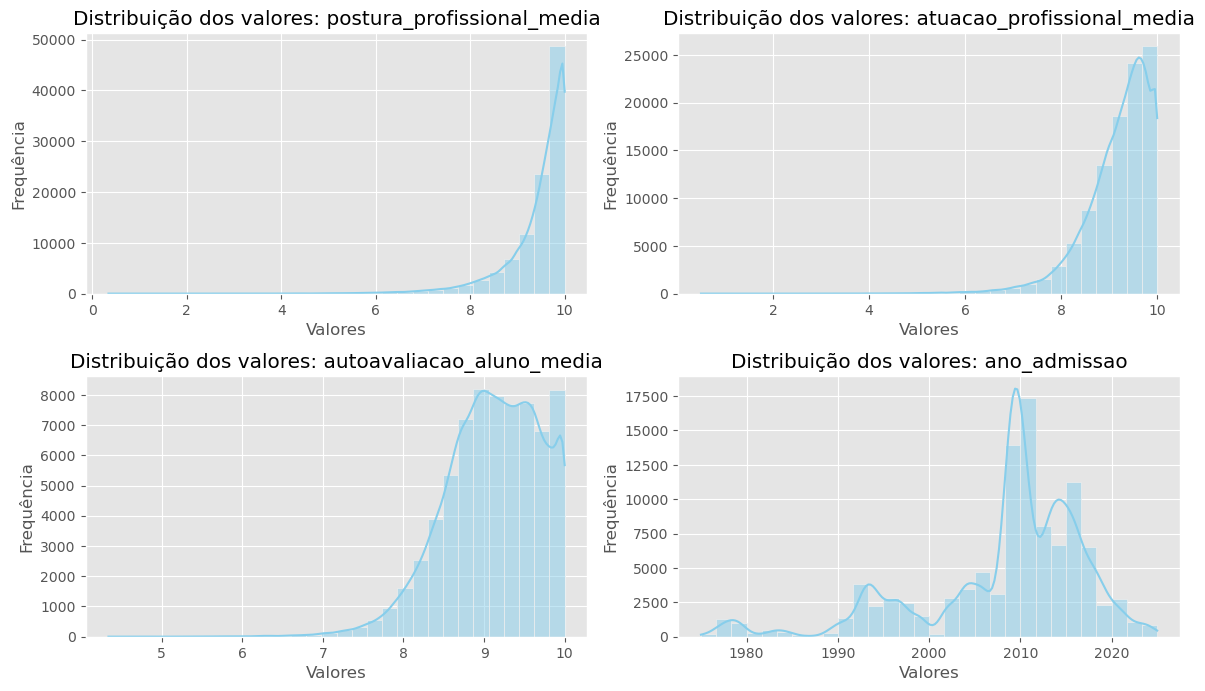

In [7]:
areas = ['postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media', 'ano_admissao']
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, area in enumerate(areas):
    sns.histplot(df[area], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribuição dos valores: {area}')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frequência')

# Remove o subplot extra (o 6º)
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.tight_layout()
plt.show()

Agora, vamos analisar os valores qualitativos:

In [ ]:

#for column in df.iloc[:, 1:5]:
#        display(df[column].value_counts())

# areas = ["nome", "sexo", "formacao", "vinculo", "categoria", "classe_funcional", "lotacao"]
# fig, axes = plt.subplots(3, 2, figsize=(12, 10))
# axes = axes.flatten()

# for i, area in enumerate(areas):
#     sns.histplot(df[area], bins=30, kde=True, color='skyblue', ax=axes[i])
#     axes[i].set_title(f'Distribuição dos valores: {area}')
#     axes[i].set_xlabel('Valores')
#     axes[i].set_ylabel('Frequência')

# # Remove o subplot extra (o 6º)
# fig.delaxes(axes[-1])
# fig.delaxes(axes[-2])

# plt.tight_layout()
# plt.show()
#df['vinculo'].value_counts()

KeyboardInterrupt: 

Como não sabemos as perguntas feitas nos formulários, vamos assumir que:

Postura profissional é algo relativo ao profissionalismo. Já a atuação diz respeito às práticas de ensino.

## Substitutos vs. permanentes

In [ ]:
df['vinculo'].value_counts()

vinculo
Ativo Permanente                           122964
Professor Substituto                         1638
Cedido                                        718
Exercicio provisorio                          355
Professor Temporario                          332
Professor Visitante                           168
Excedente de lotação                          108
Colaborador PCCTAE e Magistério Federal        11
Name: count, dtype: int64